<a href="https://colab.research.google.com/github/VoTanThinh/XULYANH/blob/main/TIENVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)
training_set=train_data.flow_from_directory('/content/drive/MyDrive/Tien/Train',target_size=(200,200), batch_size=32, class_mode='categorical')
     


test_set=test_data.flow_from_directory('/content/drive/MyDrive/Tien/Validation',target_size=(200,200 ), batch_size=32, class_mode='categorical')
     


training_set.class_indices
test_set.class_indices

Found 977 images belonging to 11 classes.
Found 115 images belonging to 11 classes.


{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [2]:
#tạo mô hình CNN sủ dụng tuần tự
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization         #dense :full conected ANN
from keras.layers import LeakyReLU
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(200,200,3),padding = 'same'))                                                          #32 lần tích chập đầu tiên
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(512,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))



#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(512,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(11,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [4]:
# Biên dịch 
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(training_set, epochs=20, batch_size=5 ,verbose=1)
test_loss,test_acc = model.evaluate(training_set)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

Epoch 1/20
31/31 [==============================] - 217s 7s/step - loss: 0.8702 - accuracy: 0.7236
Epoch 2/20
31/31 [==============================] - 192s 6s/step - loss: 0.4306 - accuracy: 0.8485
Epoch 3/20
31/31 [==============================] - 192s 6s/step - loss: 0.3566 - accuracy: 0.8680
Epoch 4/20
31/31 [==============================] - 192s 6s/step - loss: 0.3520 - accuracy: 0.8762
Epoch 5/20
31/31 [==============================] - 192s 6s/step - loss: 0.3657 - accuracy: 0.8751
Epoch 6/20
31/31 [==============================] - 191s 6s/step - loss: 0.2667 - accuracy: 0.9099
Epoch 7/20
31/31 [==============================] - 192s 6s/step - loss: 0.2467 - accuracy: 0.9202
Epoch 8/20
31/31 [==============================] - 192s 6s/step - loss: 0.2544 - accuracy: 0.9130
Epoch 9/20
31/31 [==============================] - 192s 6s/step - loss: 0.2847 - accuracy: 0.8987
Epoch 10/20
31/31 [==============================] - 190s 6s/step - loss: 0.3467 - accuracy: 0.8864
Epoch 11/

In [6]:
#Lưu
from keras.models import load_model
model.save("TienVN.h5")
model_1=load_model('TienVN.h5')

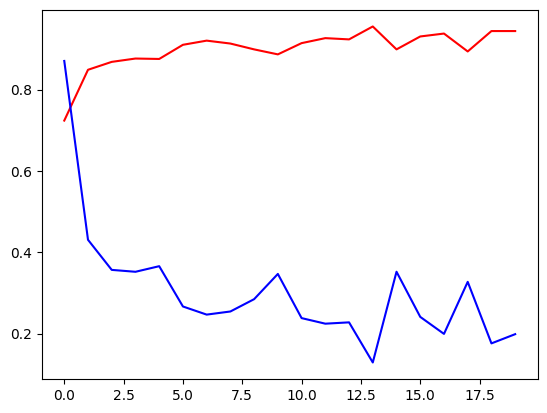

In [7]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']                                                           # VẼ ĐỒ THỊ SỬ MẤT MÁT VÀ ĐỘ HỌC TẬP CHÍNH XÁC CỦA BÀI KIỂM TRA
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label = 'Training accuracy')
plt.plot(epochs,loss,'b',label = 'Training loss')
plt.show()

1/1 [==============================] - 0s 115ms/step
500K


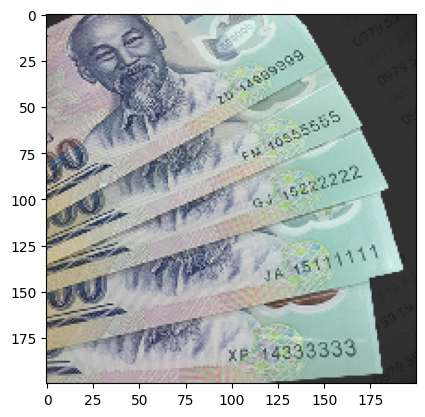

1/1 [==============================] - 0s 123ms/step
500K


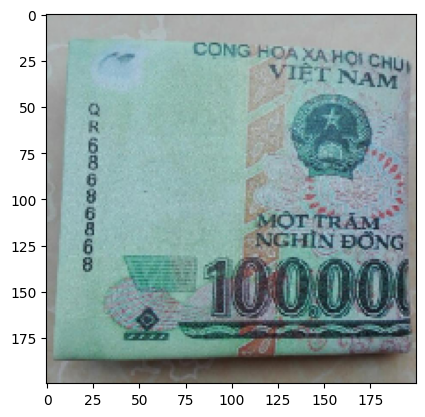

1/1 [==============================] - 0s 122ms/step
10K


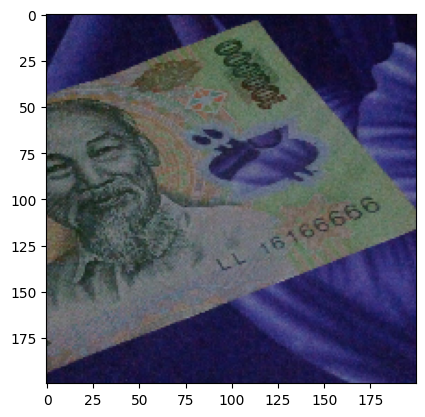

1/1 [==============================] - 0s 121ms/step
200K


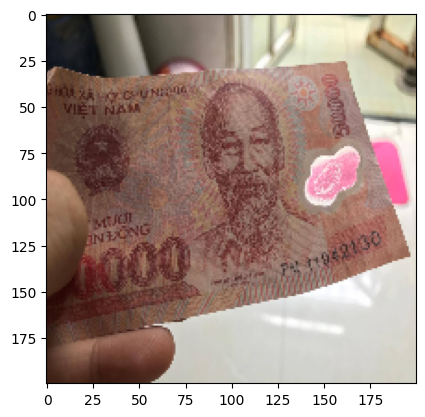

1/1 [==============================] - 0s 141ms/step
20K


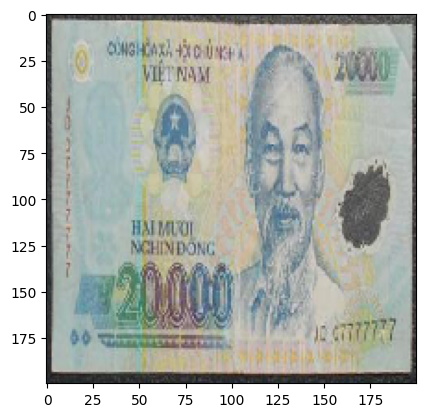

1/1 [==============================] - 0s 66ms/step
10K


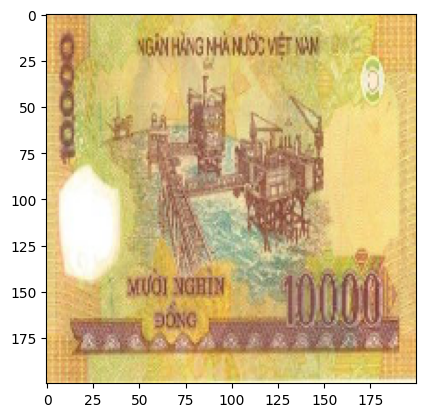

1/1 [==============================] - 0s 66ms/step
5K


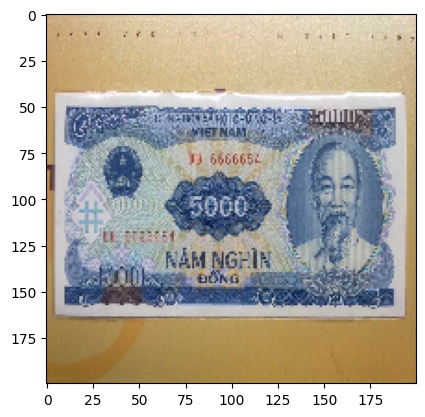

1/1 [==============================] - 0s 76ms/step
2K


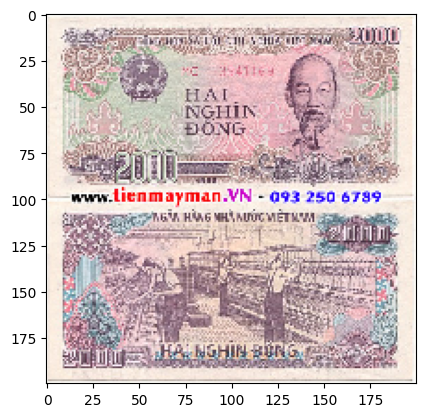

1/1 [==============================] - 0s 81ms/step
2K


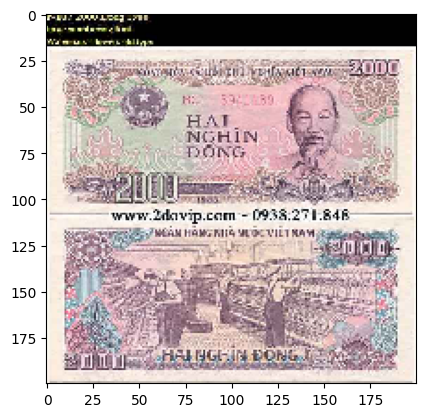

1/1 [==============================] - 0s 80ms/step
lK


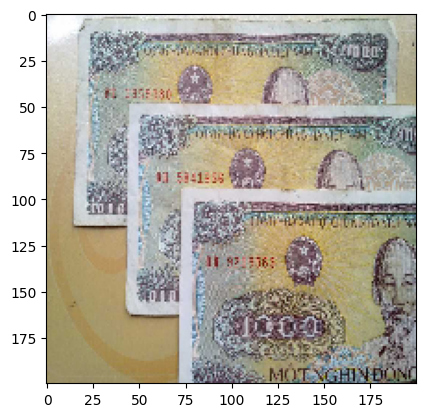

1/1 [==============================] - 0s 82ms/step
500dong


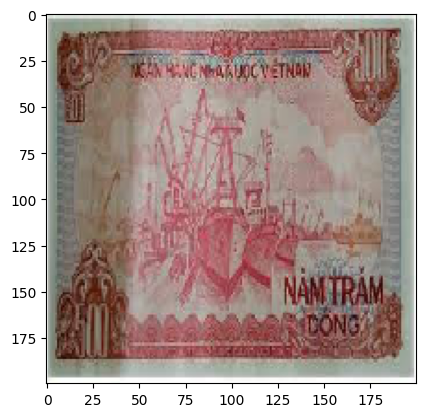

1/1 [==============================] - 0s 79ms/step
500dong


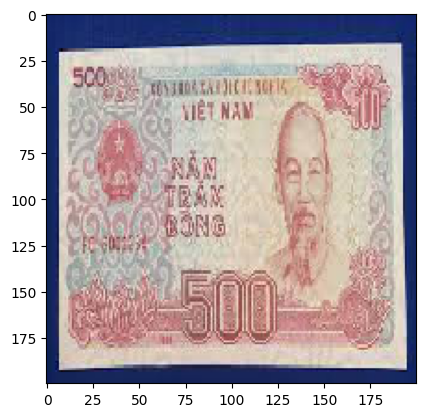

1/1 [==============================] - 0s 72ms/step
200K


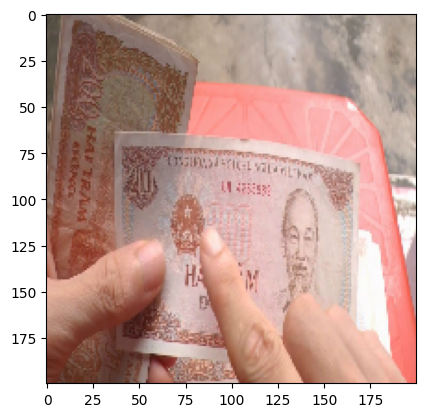

1/1 [==============================] - 0s 77ms/step
200dong


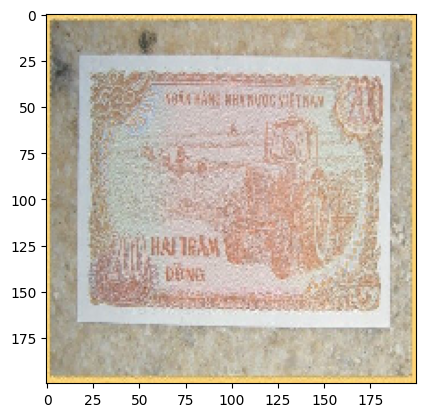

1/1 [==============================] - 0s 90ms/step
200K


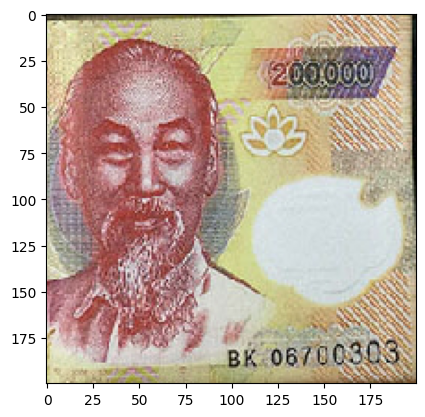

1/1 [==============================] - 0s 82ms/step
20K


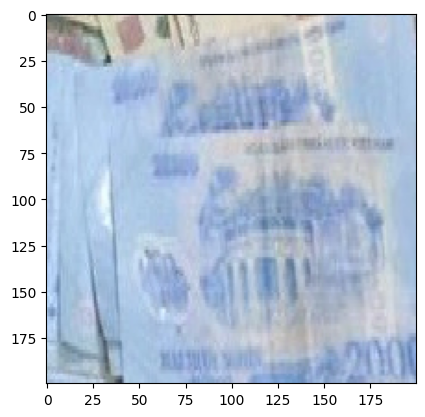

1/1 [==============================] - 0s 70ms/step
5K


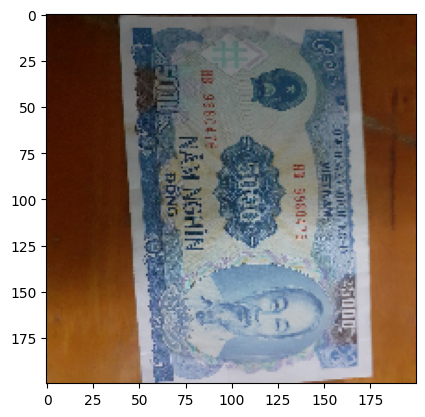

In [10]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
test='/content/drive/MyDrive/Tien/Test'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(200,200))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['100K','10K','lK','200K','200dong', '20K','2K','500K','500dong','50K','5K']
  print(class_name[result]) 
  plt.show()
